In [115]:
#IMPORTING PYTHON LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
import itertools 

# to suppress warnings
import warnings   
warnings.filterwarnings("ignore")

## Loading Data From CSV File

In [87]:
#DATA EXTRACTION FROM CSV FILE
loanDataFrame = pd.read_csv('loan.csv')
loanDataFrame.shape

(39717, 111)

## Dataset Understanding

In [ ]:
#Looking the data
loanDataFrame.head()

#Important Columns in the Dataset used for Data analysis

# loan_amnt - Loan amount requested by applicant
# funded_amnt - Loan amount commited at that point
# funded_amnt_inv - Amount commited by investor
# term - No of months loan payment
# int_rate - Interest rate of the loan
# grade/sub_grade - LC assigned loan grade
# dti - Debt to Income
# installment - Monthly loan installment amount
# annual_inc - Annual Income of loaner
# issue_d - Loan issued date
# loan_status - Current Status of the loan Charged Off/ Fully Paid
# purpose - purpose of the loan
# verification_status - Indicates if income was verified by LC

## Data Cleaning & Manipulation

In [96]:
# DATA CLEANING
# REMOVING COLUMNS HAVING 90% EMPTY/MISSING ROW VALUES

# Function_name : Null values Percentage for columns
# Returns : a dataframe containing categories having missing values and % of missing values in those categories
def check_null_values(df):
    return round((df.isnull().sum()*100/len(df)).sort_values(ascending = False),2)

null_col_90 = check_null_values(loanDataFrame)[check_null_values(loanDataFrame)>90]
null_col_90.index
len(null_col_90)

56

In [97]:
# Drop the columns having missing values more than 90% that is 56 columns
loanDataFrame.drop(columns = null_col_90.index, inplace = True)
loanDataFrame.shape

(39717, 55)

In [98]:
# DATA CLEANING
# REMOVING COLUMNS HAVING SAME ROW VALUES 
nunique = loanDataFrame.nunique()
cols_to_drop = nunique[nunique == 1].index
loanDataFrame = loanDataFrame.drop(cols_to_drop, axis=1)

#REMOVING ROWS WITH LOAN STATUS = CURRENT AS VALUES EDA ANALYSIS IS WITH Loan status = "Full Paid" Vs "Charged Off"
loanDataFrame = loanDataFrame.loc[loanDataFrame["loan_status"] != "Current"]
loanDataFrame.shape

(38577, 46)

In [100]:
# Column data formating to expected type of values
loanDataFrame["emp_length"] = loanDataFrame["emp_length"].astype(str)
replacements = {
   'emp_length': {
      r'(years)': '',
       r'(year)': '',
       r'(\+)': '',
       r'(\<\s+1)': '0'
   }
}
loanDataFrame.replace(replacements, regex=True, inplace=True)
loanDataFrame["term"] = loanDataFrame["term"].astype(str)
replacements = {
   'term': {
      r'(months)': ''
   }
}
loanDataFrame.replace(replacements, regex=True, inplace=True)
loanDataFrame["int_rate"] = loanDataFrame["int_rate"].astype(str)
replacements = {
   'int_rate': {
      r'(\%)': ''
   }
}
loanDataFrame.replace(replacements, regex=True, inplace=True)
loanDataFrame["revol_util"] = loanDataFrame["revol_util"].astype(str)
replacements = {
   'revol_util': {
      r'(\%)': ''
   }
}
loanDataFrame.replace(replacements, regex=True, inplace=True)
loanDataFrame["emp_length"] = loanDataFrame["emp_length"].fillna(0)

In [177]:
#Datatype Conversions
loanDataFrame["dti"] = loanDataFrame["dti"].round().astype('float')
loanDataFrame["annual_inc"] = loanDataFrame["annual_inc"].round().astype('Int64')
loanDataFrame["emp_length"] = loanDataFrame["emp_length"].astype(str).astype(float).round().astype('Int64')
loanDataFrame["term"] = loanDataFrame["term"].astype(str).astype(float).round().astype('Int64')
loanDataFrame["int_rate"] = loanDataFrame["int_rate"].astype(str).astype(float).round().astype('float')

In [179]:
check_null_values(loanDataFrame).head(10)

#Now we have only 8 columns which have missing values, these columns are not important for data analysis,
#so skip the imputing for these columns

mths_since_last_delinq    64.60
installment_grp           44.62
desc                      32.46
annual_inc_grp             6.84
emp_title                  6.16
pub_rec_bankruptcies       1.80
int_rate_grp               1.49
loan_amnt_grp              0.81
last_pymnt_d               0.19
title                      0.03
dtype: float64

# #Identifying Outliers  columns

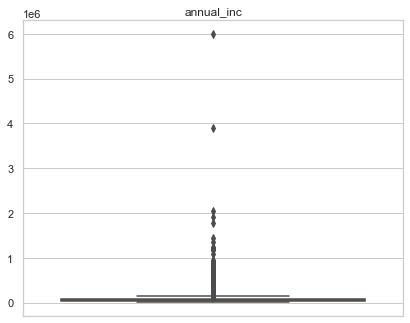

In [117]:
#outlier_col = ["loan_amnt","int_rate", "funded_amnt_inv", "installment", "annual_inc"]
outlier_col = ["annual_inc"]

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = loanDataFrame[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

In [118]:
# DATA CLEANING based on Outliers
# ANNUAL INCOME IDENTIFIED AS OUTLIERS WITH HIGHER VALUES HENCE REMOVING OUTLIER ROWS
# INTREST RATE IDENTIFIED AS OUTLIERS WITH LOWER VALUES HENCE REMOVING OUTLIER ROWS

for columnInfo in ["annual_inc"]:
#for columnInfo in ["annual_inc"]:
    Q1 = loanDataFrame[columnInfo].quantile(0.25)
    Q3 = loanDataFrame[columnInfo].quantile(0.95)
    IQR = Q3-Q1
    minValue = Q1-(1.5*IQR)
    maxValue = Q3+(1.5*IQR)
    loanDataFrame.drop(loanDataFrame[(loanDataFrame[columnInfo] < minValue) | (loanDataFrame[columnInfo] > maxValue)].index, inplace=True)

loanDataFrame.shape

(38357, 46)

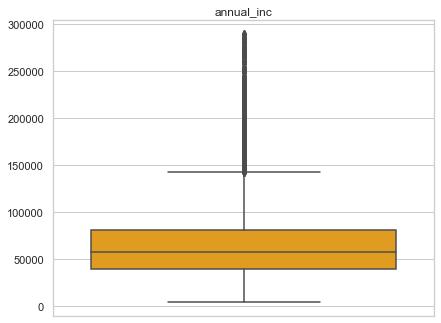

In [119]:
#outlier_col = ["loan_amnt","int_rate", "funded_amnt_inv", "installment", "annual_inc"]
outlier_col = ["annual_inc"]

plt.figure(figsize=[15,25])
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
    plt.subplot(4,2,j+1)
    sns.boxplot(y = loanDataFrame[i], orient = "h", color = "orange")
    #plt.yticks(fontsize=8)
    plt.xlabel("")
    plt.ylabel("")
    plt.title(i)

# # Date time Manipulations

In [194]:
#Convert the 'Loan Issued Date' column 'issue_d' to proper datetime format
loanDataFrame['conv_issue_d'] = pd.to_datetime(loanDataFrame['issue_d'], format='%b-%y')
loanDataFrame['loan_issued_year'] = loanDataFrame['conv_issue_d'].dt.year


# # Create Categorical Columns

In [131]:
loanDataFrame = loanDataFrame[loanDataFrame["loan_status"] != "Current"]
loanDataFrame["loan_amnt_grp"]=pd.cut(loanDataFrame.loan_amnt, [1000,2500,5000, 10000,15000,20000,25000, 30000, 35000])
loanDataFrame["int_rate_grp"]=pd.cut(loanDataFrame.int_rate, [5,10,15, 20,25,30])
loanDataFrame["annual_inc_grp"]=pd.cut(loanDataFrame.annual_inc, [25000,50000,75000, 100000,125000,150000, 200000, 250000])
loanDataFrame["installment_grp"]=pd.cut(loanDataFrame.installment, [250,500,750, 1000,1250,1500, 1750, 2000])
loanDataFrame['defaulter'] = loanDataFrame["loan_status"].apply(
    lambda x: 1 if (x == 'Charged Off') else 0) 

In [196]:
my_categorical_columns = ['grade', 'sub_grade', 'purpose', 'verification_status', 'home_ownership', 'emp_title', 'loan_amnt_grp', 'int_rate_grp', 'annual_inc_grp', 'installment_grp']

for col in my_categorical_columns:
    loanDataFrame[col] = pd.Categorical(loanDataFrame[col])
loanDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38357 entries, 0 to 39716
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       38357 non-null  int64         
 1   member_id                38357 non-null  int64         
 2   loan_amnt                38357 non-null  int64         
 3   funded_amnt              38357 non-null  int64         
 4   funded_amnt_inv          38357 non-null  float64       
 5   term                     38357 non-null  Int64         
 6   int_rate                 38357 non-null  float64       
 7   installment              38357 non-null  float64       
 8   grade                    38357 non-null  category      
 9   sub_grade                38357 non-null  category      
 10  emp_title                35994 non-null  category      
 11  emp_length               38357 non-null  Int64         
 12  home_ownership           38357 n

# # Univariate and Bivariate Plot Functions

In [162]:
# Function: Draws Bivariate line charts
def bivariate_line(x,y,df,hue,labels):
    plt.figure(figsize=[25,25])
    sns.relplot(x=x, y=y, data=df, hue=hue,kind='line',legend = False)
    plt.legend(labels=labels)
    plt.xticks(rotation=90, ha='right')
    plt.show()

# Function: Creates Bivariate bar charts    
def bivariate_bar(title,x,y,df,hue,labels):
    
    #plt.figure(15, 6)
    sns.barplot(x=x,y=y,data=df, hue=hue)     
        
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
    plt.xlabel(x,fontsize = 15)    
    plt.ylabel(y,fontsize = 15)    
    plt.title(title,fontsize = 20) 
    plt.xticks(rotation=45, ha='right')
    plt.legend(labels = labels )
    plt.show()

# Function: Creates Bivariate line charts     
def bivariate_point_plot(df,hue,x,y):
    plt.figure(figsize=(15,6))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.xticks(rotation=75, ha='center')
    plt.title(x+" vs "+y,fontsize = 15)    
    
# Function: Creates univariate line charts    
def univariate_plot(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
    val_count = dataset[col].value_counts()
    df1 = pd.DataFrame({col: val_count.index,'count': val_count.values})        

    target_1_percentage = dataset[[col, target_col]].groupby([col],as_index=False).mean()
    target_1_percentage[target_col] = target_1_percentage[target_col]*100
    target_1_percentage.sort_values(by=target_col,inplace = True)
        
        
# If the plot is not readable, use the log scale

    if(h_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))
              
        
# 1. Subplot 1: Count plot of the column
        
    s = sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
    ax1.set_title(col, fontsize = 20)
    ax1.legend(['Fully Paid','Charged Off'])
    ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})

    if(x_label_angle):
        s.set_xticklabels(s.get_xticklabels(),rotation=75)
        
# 2. Subplot 2: Percentage of charged-off within the column
        
    s = sns.barplot(ax=ax2, x = col, y=target_col, data=target_1_percentage)
    ax2.set_title("Charged Off % in "+col, fontsize = 20)    
    ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
    ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})

    if(x_label_angle):
        s.set_xticklabels(s.get_xticklabels(),rotation=75)

            
# If the plot is not readable, use the log scale
                
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
    else:
        ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})

    plt.show()    


# Univariate Analysis

# Below Visualization Give us Idea on Defaulter percentage.

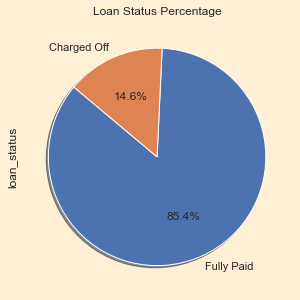

In [69]:
#UNIVARIATE ANALYSIS : LOAN RATIO - FULLY PAID Vs CHANGED OFF : 85%/15%
plt.figure(figsize=(5,5),facecolor='papayawhip')
plt.title("Loan Status Percentage")
plt.xticks(rotation=90, ha='center')
loanDataFrame["loan_status"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

# Below Visualization Give us Idea on Loan Term percentage.

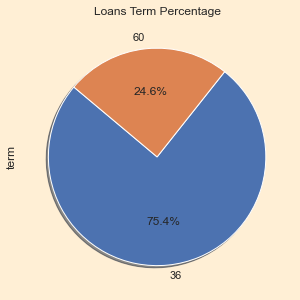

In [198]:
#UNIVARIATE ANALYSIS : More than 75% of Total Loans are Short Term (36 months) compared to Long term (60 months)
plt.figure(figsize=(5,5),facecolor='papayawhip')
plt.title("Loans Term Percentage")
plt.xticks(rotation=90, ha='center')

loanDataFrame["term"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True, startangle=140)
plt.show()

# Below Visualization Give us Idea on Year Wise Loans Issued and Defaulter Percentage.

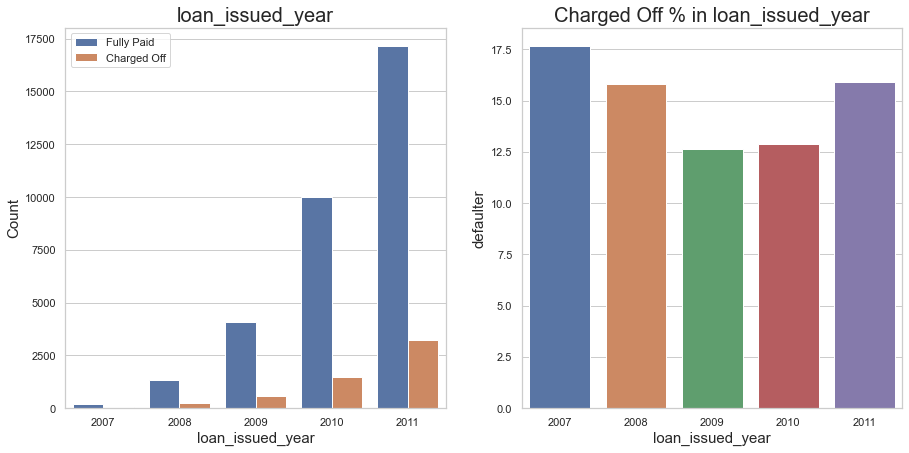

In [197]:
univariate_plot(loanDataFrame,"loan_issued_year","defaulter",False,False,True)

# Below Visualization Give us Idea on Grade/Sub Grade Wise Loans Applied and Defaulter Percentage.

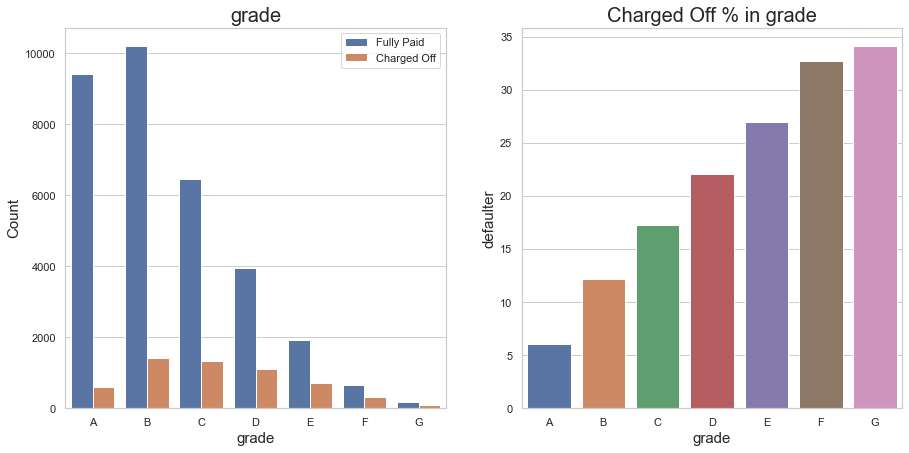

In [134]:
univariate_plot(loanDataFrame,"grade","defaulter",False,False,True)

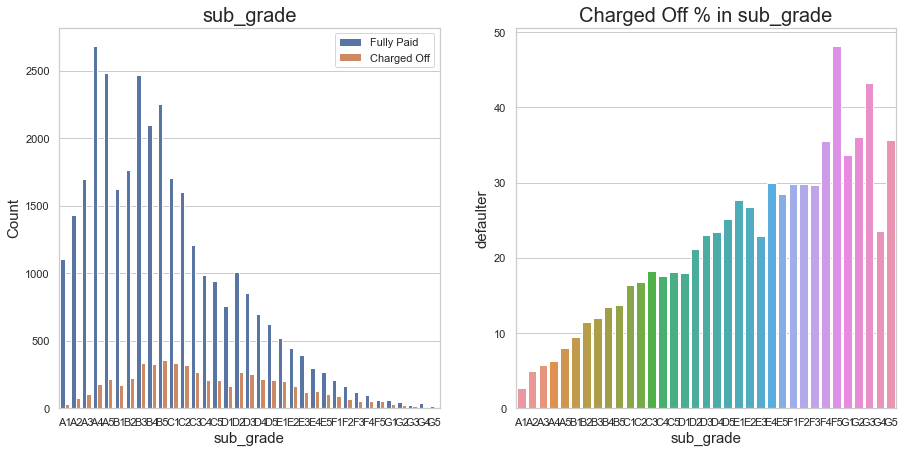

In [136]:
univariate_plot(loanDataFrame,"sub_grade","defaulter",False,False,True)

# Below Visualization Give Defaulter Percentage Against Loan verification status

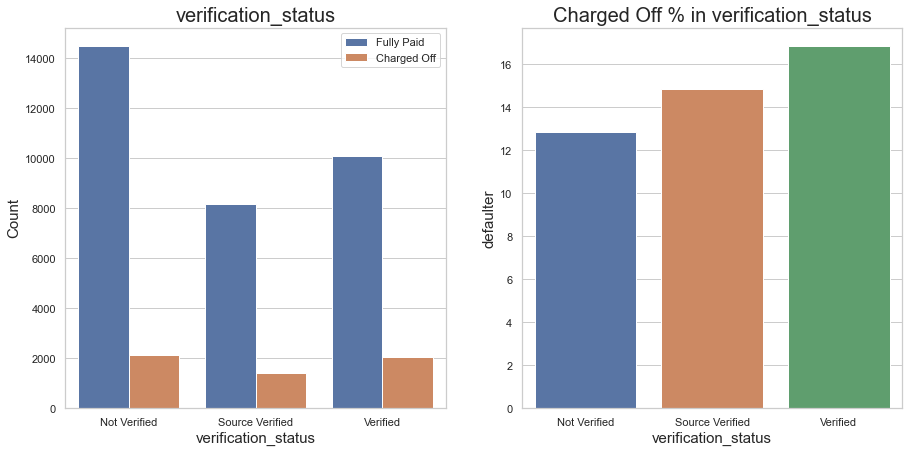

In [138]:
univariate_plot(loanDataFrame,"verification_status","defaulter",False,False,True)

# Below Visualization Give us Idea on Purpose of Loans Applied Vs Defaulter Percentage.

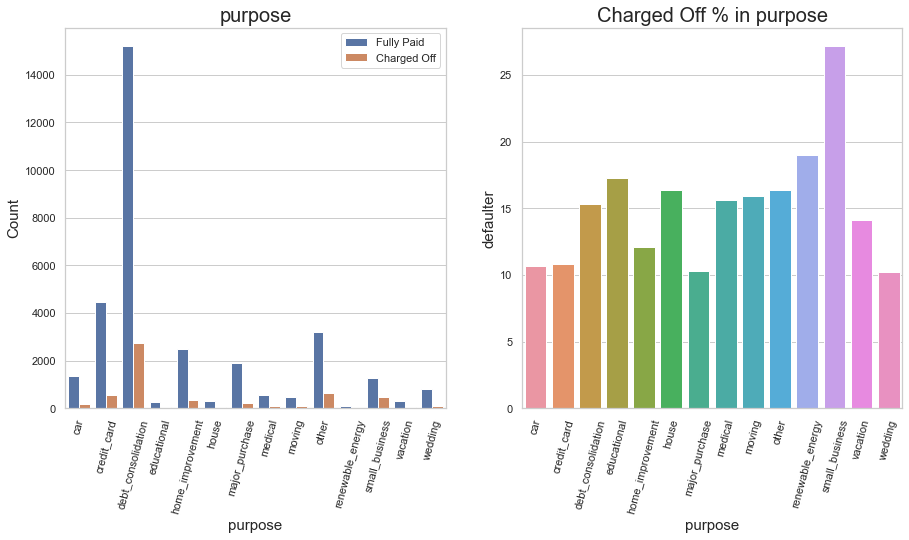

In [139]:
univariate_plot(loanDataFrame,"purpose","defaulter",False,True,True)

# Below Visualization Give us Idea on Loans Terms Vs Defaulter Percentage.

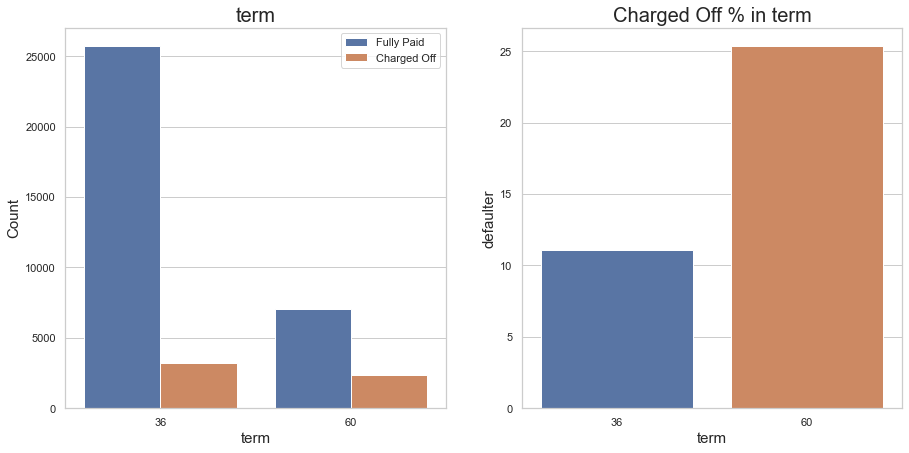

In [141]:
univariate_plot(loanDataFrame,"term","defaulter",False,False,True)

# Numerical Univariate Analysis

# Below Visualization Give us Idea on Numerical Univariate Analysis for various cloumns

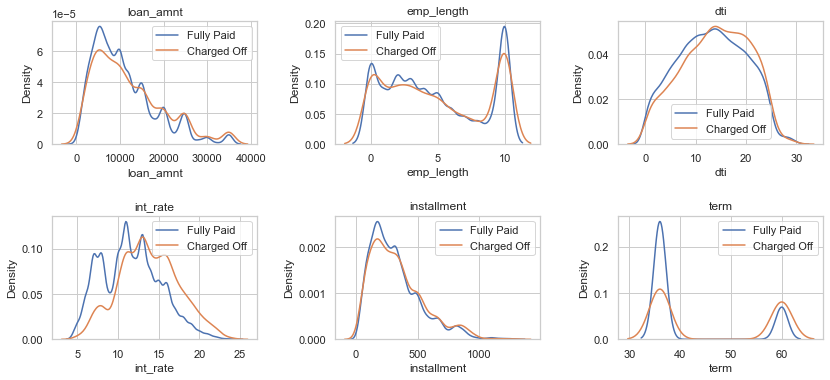

In [178]:
# Fully Paid dataframe
fully_paid_df = loanDataFrame[loanDataFrame['loan_status']== 'Fully Paid']

# Chared Off 
charged_off_df = loanDataFrame[loanDataFrame['loan_status']== 'Charged Off']



# Numerical Univariate Analysis as distribution plot to see density
numerical_col = loanDataFrame[[ 'loan_amnt', 'emp_length','dti', 'int_rate','installment', 'term']]

fig = plt.figure(figsize=(12, 8))

for i in enumerate(numerical_col):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(fully_paid_df[i[1]], hist=False, label ="Fully Paid")
    sns.distplot(charged_off_df[i[1]], hist=False,label ="Charged Off")    
    plt.title(i[1], fontdict={'fontsize' : 12, 'fontweight' : 6})
    plt.legend()

fig.tight_layout(pad=2.0)

plt.show()

# Below Visualization Give us Bivariate Analysis Against Loan Defaulters

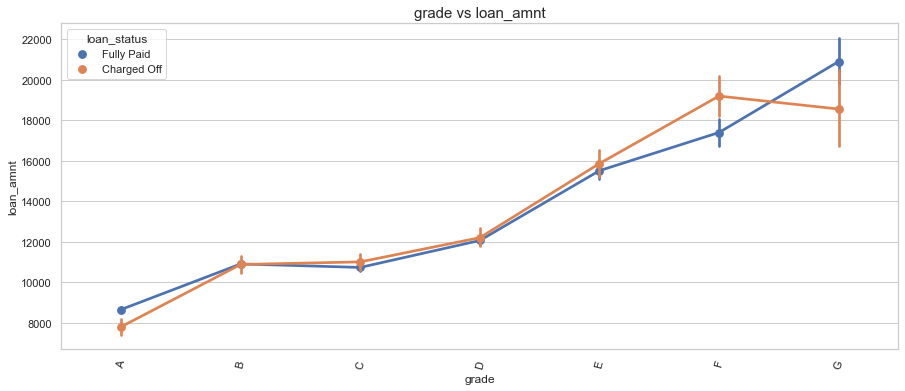

In [155]:
bivariate_point_plot(loanDataFrame, "loan_status", "grade", "loan_amnt")

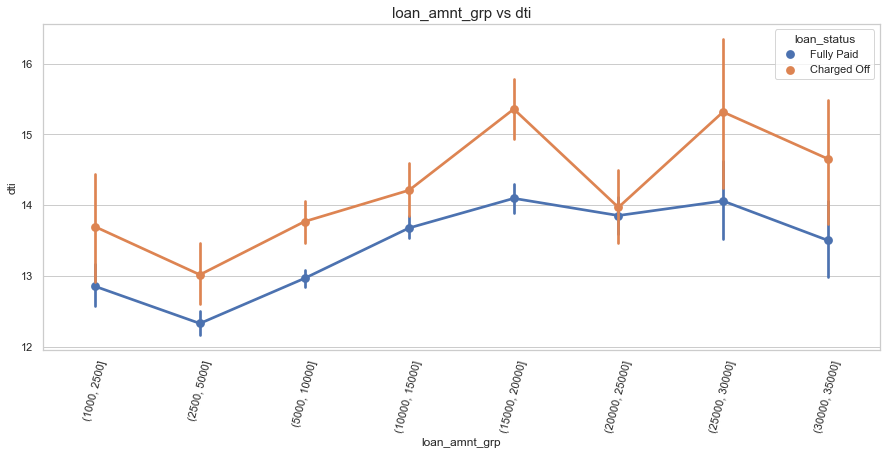

In [153]:
bivariate_point_plot(loanDataFrame, "loan_status", "loan_amnt_grp", "dti")

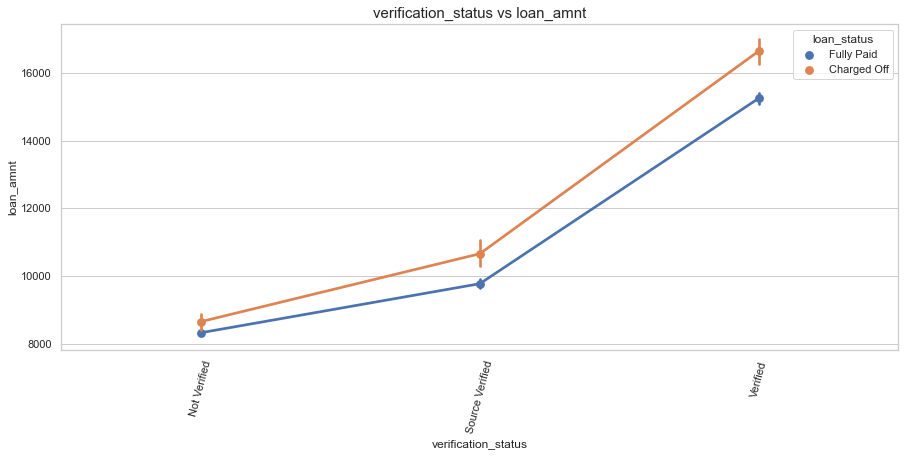

In [169]:
bivariate_point_plot(loanDataFrame, "loan_status", "verification_status", "loan_amnt")

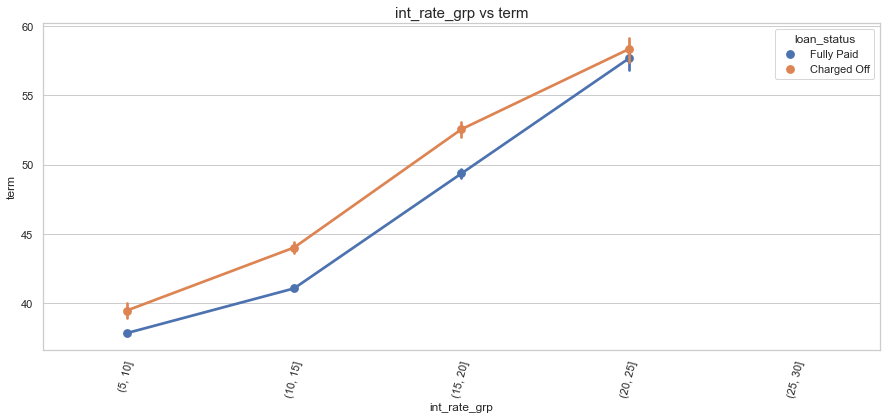

In [173]:
bivariate_point_plot(loanDataFrame, "loan_status", "int_rate_grp", "term")

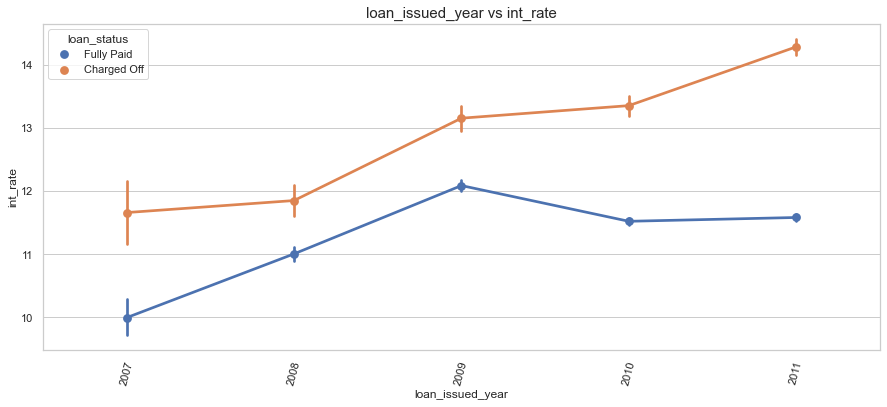

In [200]:
bivariate_point_plot(loanDataFrame, "loan_status", "loan_issued_year", "int_rate")

#  Below Visualization Give us Correaltion of important numerical columns for Charged-off Dataset

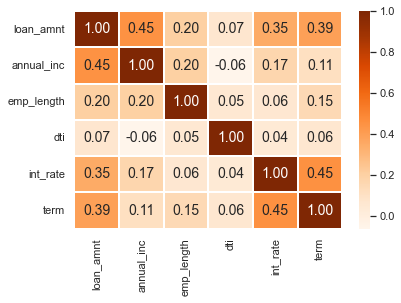

In [191]:
#plotting heatmap to see linear correlation charged-off vs fully-paid
cols_for_corr = ["loan_amnt", "annual_inc","emp_length", "dti", "int_rate", "term"]

loan_df_charged_off = loanDataFrame.loc[loanDataFrame['loan_status']== "Charged Off", cols_for_corr]
loan_df_fully_paid = loanDataFrame.loc[loanDataFrame['loan_status']== "Fully Paid", cols_for_corr]

sns.heatmap(loan_df_charged_off.corr(), fmt='.2f', annot=True, cmap='Oranges', linewidth=.1, annot_kws={'size': 14});

# Below Visualization Give us Correaltion of important numerical columns for Fully-Paid Dataset

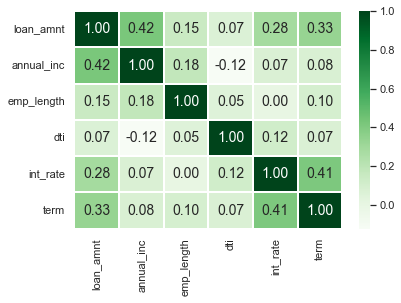

In [192]:
sns.heatmap(loan_df_fully_paid.corr(), fmt='.2f', annot=True, cmap='Greens', linewidth=.1, annot_kws={'size': 14});